In [22]:
%matplotlib inline
from contextlib import contextmanager
from multiprocessing import Process

@contextmanager
def app_running(app_func):
    p = Process(target=app_func)
    p.start()
    time.sleep(0.1)
    yield
    p.terminate()
    
import async_timeout
import time

class Stats:
    def __init__(self):
        self.request_latencies = []
        self.timed_out = 0
        self.elapsed_time = 0

async def fetch(stats, session, url):
    start_time = time.time()
    try:
        async with session.get(url) as response:
            await response.text()
    except:
        stats.timed_out += 1
    else:
        elapsed_time = time.time() - start_time
        stats.request_latencies.append(elapsed_time)

import aiohttp
TOTAL_COUNT = 10000
MAX_CONNECTIONS = 100

async def benchmark(root="http://localhost:8000/"):
    url = root + "foo"
    stats = Stats()
    start_time = time.time()
    conn = aiohttp.TCPConnector(limit=MAX_CONNECTIONS)
    async with aiohttp.ClientSession(connector=conn) as session:
        task_list = []
        for i in range(TOTAL_COUNT):
            task_list.append(fetch(stats, session, url))
        await asyncio.gather(*task_list)
    elapsed_time = time.time() - start_time
    stats.elapsed_time = elapsed_time
    return stats

In [24]:
def start_aiohttp_app():
    from aiohttp import web

    async def handle(request):
        name = request.match_info.get('name', "Anonymous")
        text = "Hello, " + name
        return web.Response(text=text)

    app = web.Application()
    app.router.add_get('/', handle)
    app.router.add_get('/{name}', handle)
    web.run_app(app, port=8000)
    
import asyncio
loop = asyncio.get_event_loop()
with app_running(start_aiohttp_app):
    stats = loop.run_until_complete(benchmark())

Process Process-13:
Traceback (most recent call last):
  File "/home/tsutsumi/lib/python3.6/asyncio/base_events.py", line 1043, in create_server
    sock.bind(sa)
OSError: [Errno 98] Address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/tsutsumi/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/tsutsumi/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-24-779823623b25>", line 12, in start_aiohttp_app
    web.run_app(app, port=8000)
  File "/home/tsutsumi/workspace/toumorokoshi.github.com/notebooks/lib/python3.6/site-packages/aiohttp/web.py", line 414, in run_app
    asyncio.gather(*server_creations, loop=loop)
  File "/home/tsutsumi/lib/python3.6/asyncio/base_events.py", line 466, in run_until_complete
    return future.result()
  File "/home/tsutsumi/lib/python3.6/asyncio/base

In [18]:
def start_flask_app():
    from flask import Flask
    app = Flask(__name__)

    @app.route("/<name>")
    def hello(name):
        return "Hello World!"
    
    app.run(port=8000)

    
import asyncio
loop = asyncio.get_event_loop()
with app_running(start_flask_app):
    request_latencies, total_time = loop.run_until_complete(benchmark())

 * Running on http://127.0.0.1:8000/ (Press CTRL+C to quit)
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 2

127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:01] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:02] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:03] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:04] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:05] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:06] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:07] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:08] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:09] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:10] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:11] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:12] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:13] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:14] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:15] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:16] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:17] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:18] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:19] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:20] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:21] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:22] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:23] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:24] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:25] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:26] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:27] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:28] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:29] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:30] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:31] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:32] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:33] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:34] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:35] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:36] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:37] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:38] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:39] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:40] "GET /foo HTTP/1.1

127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1" 200 -
127.0.0.1 - - [04/Jun/2017 21:43:41] "GET /foo HTTP/1.1

42.13624596595764


(array([ 1873.,  1376.,  1180.,   602.,   586.,   591.,   588.,   603.,
         1096.,  1505.]),
 array([  2.1552918 ,   5.92863972,   9.70198765,  13.47533557,
         17.2486835 ,  21.02203143,  24.79537935,  28.56872728,
         32.3420752 ,  36.11542313,  39.88877106]),
 <a list of 10 Patch objects>)

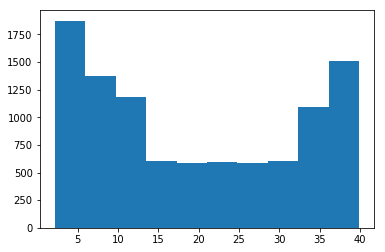

In [19]:
import matplotlib.pyplot as plt

print(total_time)
plt.hist(request_latencies)

NameError: name 'app_running' is not defined